Regresion lineal multiple

Importar las librerias necesarias

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

#Importacion de pandas para cargar el DataSet
import pandas as pd

# Librerias para graficación (trazado de graficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Importar y cargar el DataSet

In [3]:
#importamos el dataset
FileDs = r'C:\Users\jhean\OneDrive\Documentos\Tareas\Inteligencia artificial\DataSets\workout_fitness_tracker_data.csv'
# Cargamos el dataset
data = pd.read_csv(FileDs, delimiter=',')
data["Workout Intensity"] = data["Workout Intensity"].map({"Low": 1, "Medium": 2, "High": 3})#Convertimos los datos de Workout Intensity a valores numericos
X = data.drop(columns=["User ID", "Calories Burned", "Gender", "Workout Type", "Mood Before Workout", "Mood After Workout", "Body Fat (%)", "VO2 Max", "Water Intake (liters)"]).values  #Filtrado de columnas no relevantes para inferir en y.
y = data["Calories Burned"].values  # Variable a inferir en este caso las calorias quemadas


Verificacion de carga de datos

In [ ]:
data

In [ ]:
#Data frame con los datos limpios
column_names = ["Age", "Height(cm)", "Weight(kg)", "Workout Duration(mins)", "Heart Rate(bpm)", "Steps Taken", "Distance(km)", "Workout Intensity", "Sleep Hours", "Daily Calories Intake", "Resting Heart Rate(bpm)"]
dataclean = pd.DataFrame(X, columns=column_names)
dataclean

In [ ]:
print(y)

Normalizar los datos

In [4]:
#Importar StandardScaler para normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X) #Este escalador resata la media y divide por la desviacion estandar de cada columna
# Las medias y desviaciones estándar (Opcional)
#mu = scaler.mean_
#sigma = scaler.scale_

In [ ]:
#DataFrame con las caracteristicas normalizados
dataclean_normalized = pd.DataFrame(X_normalized, columns=column_names)
dataclean_normalized

Añadir el termino de interseccion o termino independiente
$$
h_{\theta}(X) = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \dots + \theta_n X_n
$$
#Si no añadimos este termino significaria que en caso de que las X son igua a 0 el modelo se veria forzado a pasar por el origen y esto limitaria la capacidad de aprendisaje del modelo y perdiendo precision en el mismo.

In [ ]:
X_intercept = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]  # Con np.c_ concatenamos los arrays y con np.ones añadimos una columna de 1's a X_normalized
dataclean_intercept = pd.DataFrame(X_intercept, columns=["Intercept"] + column_names)
dataclean_intercept

Desarrollar la Funcion de costo
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

Donde:
$$
h_{\theta}(X) = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + \dots + \theta_n X_n
$$

In [ ]:
#Verificamos los tipos de arrays
print(type(X_intercept))
print(type(y))
#Conversion de arrays a numpy(En caso de ser neceaario)
#xnp = np.array(X_intercept)
#ynp = np.array(y)

In [13]:
#Numero de caracteristicas(incluyendo el termino de sesgo[bias]), recordando que para el nuemero de filas es 0 y para el numero de columnas es 1
n = X_intercept.shape[1]
#Inicializar theta en ceros ya que si usamos valores grandes o aleatorios el algoritmo de descenso de gradiente puede converger lento o de forma inestable
theta = np.zeros(n)
#Definimos la hipotesis de la forma simplificada ya que theta esta en 0
def hypothesis(X, theta):
    return X.dot(theta)#Multiplicacion de matrices
#Implementacion de la funcion de costo (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    error = h - y
    costo = (1/(2*m)) * np.dot(error, error)
    #print("Costo: ", costo)
    return costo

Descenso por el gradiente

In [14]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        h = hypothesis(X, theta)
        error = h - y
        gradient = (1/m) * np.dot(X.T, error)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


In [16]:
#Ejecucion del algoritmo
# Hiperparámetros
alpha = 0.01  # Tasa de aprendizaje
num_iters = 1000  # Número de iteraciones

# Ejecutar el algoritmo
theta_final, cost_history = gradient_descent(X_intercept, y, theta, alpha, num_iters)


In [18]:
#Costo mas bajo: 33927.75495975896


In [12]:
# Crear un nuevo ejemplo con valores específicos
nuevo_dato = np.array([[20, 170, 64, 60, 130, 8850, 3, 2, 6, 3500, 70]])
dato2= np.array([[56, 154, 89, 39, 118, 14102, 6.55, 2, 5.8, 2071, 65]])
#age, altura, peso, duracion del entrenamiento, ritmo cardiaco, pasos dados, distancia, intensidad del entrenamiento, horas de sueño, ingesta diaria de Kcalorias, ritmo cardiaco en reposo

# Normalizar los nuevos datos
nuevo_dato_normalizado = scaler.transform(nuevo_dato)
dato2= scaler.transform(dato2)

# Agregar el término de intersección
nuevo_dato_intercept = np.c_[np.ones((nuevo_dato_normalizado.shape[0], 1)), nuevo_dato_normalizado]
dato2_intercept = np.c_[np.ones((dato2.shape[0], 1)), dato2]

# Hacer la predicción con el modelo
calorias_predichas = hypothesis(nuevo_dato_intercept, theta_final)
calorias_predichas2 = hypothesis(dato2_intercept, theta_final)

print(f" Calorías quemadas estimadas ahora jh: {calorias_predichas[0]:.2f} kcal")
print(f" Calorías quemadas estimadas: {calorias_predichas2[0]:.2f} kcal")

 Calorías quemadas estimadas ahora jh: 555.08 kcal
 Calorías quemadas estimadas: 553.52 kcal


Verificar presicion del modelo

In [13]:
#Validacion mediante regla de 3 simple
X1=(384*100)/553.66
X2=100-(118*100/672)
# Imprimir resultados
print(f"Precision respecto al primer valor 1: {X1:.2f}%")
print(f"Presicion respecto al valor 4: {X2:.4f}%")


Precision respecto al primer valor 1: 69.36%
Presicion respecto al valor 4: 82.4405%


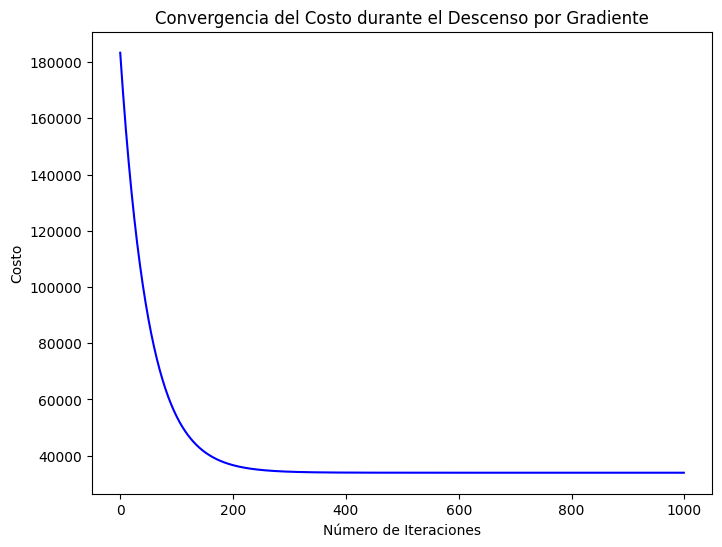

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(num_iters), cost_history, color='blue')
plt.title("Convergencia del Costo durante el Descenso por Gradiente")
plt.xlabel("Número de Iteraciones")
plt.ylabel("Costo")
plt.show()
